In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("global_ecommerce_sales.csv")
df.head()

,Transaction Date,Customer ID,Region,Product,Category,Price,Quantity,Discount (%),Total Revenue,Payment Method
0,2022-10-21,CUST_32167,Asia,Product_8109,Fashion,805.51,4,3.63,3105.08,Cash
1,2022-07-25,CUST_79483,Europe,Product_7873,Books,92.96,1,1.83,91.26,Cash
2,2023-08-24,CUST_97186,Europe,Product_9334,Home & Kitchen,700.87,3,21.86,1642.98,PayPal
3,2023-11-23,CUST_50953,Asia,Product_1364,Electronics,507.21,3,14.67,1298.41,Credit Card
4,2022-04-11,CUST_43293,Europe,Product_9899,Toys & Games,985.92,5,26.19,3638.54,PayPal


In [4]:
df.columns

Index(['Transaction Date', 'Customer ID', 'Region', 'Product', 'Category',
       'Price', 'Quantity', 'Discount (%)', 'Total Revenue', 'Payment Method'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction Date  500000 non-null  object 
 1   Customer ID       500000 non-null  object 
 2   Region            500000 non-null  object 
 3   Product           500000 non-null  object 
 4   Category          500000 non-null  object 
 5   Price             500000 non-null  float64
 6   Quantity          500000 non-null  int64  
 7   Discount (%)      500000 non-null  float64
 8   Total Revenue     500000 non-null  float64
 9   Payment Method    500000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 38.1+ MB


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df[['Price', 'Quantity', 'Discount (%)', 'Total Revenue']].corr()

,Price,Quantity,Discount (%),Total Revenue
Price,1.000000,-0.001438,0.002490,0.714503
Quantity,-0.001438,1.000000,-0.000752,0.589763
Discount (%),0.002490,-0.000752,1.000000,-0.126697
Total Revenue,0.714503,0.589763,-0.126697,1.000000


In [17]:
import statsmodels.api as sm

X = df[['Price', 'Quantity', 'Discount (%)']]
X = sm.add_constant(X)
y = df['Total Revenue']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Total Revenue   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 1.177e+06
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        00:12:33   Log-Likelihood:            -3.6528e+06
No. Observations:              500000   AIC:                         7.306e+06
Df Residuals:                  499996   BIC:                         7.306e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1055.6670      1.732   -609.560   

In [19]:
df.groupby('Region')['Total Revenue'].mean()

Region
Africa           1284.299274
Asia             1282.263810
Australia        1287.943324
Europe           1282.140826
North America    1276.320467
South America    1281.929997
Name: Total Revenue, dtype: float64

In [20]:
from scipy.stats import f_oneway

groups = [
    df[df['Region'] == r]['Total Revenue']
    for r in df['Region'].unique()
]

f_stat, p_value = f_oneway(*groups)
print(p_value)


0.33553015727168506


In [21]:
df.groupby('Category')['Total Revenue'].mean()

Category
Automotive           1282.868228
Books                1288.505820
Electronics          1280.901963
Fashion              1283.914942
Health & Beauty      1277.506457
Home & Kitchen       1280.642052
Sports & Outdoors    1279.262605
Toys & Games         1286.168193
Name: Total Revenue, dtype: float64

In [22]:
from scipy.stats import f_oneway
groups = [
    df[df['Category']==r]['Total Revenue']
    for r in df['Category'].unique()
]
t,p = f_oneway(*groups)

In [23]:
p

np.float64(0.5910877001375261)

In [24]:
df.groupby('Product')['Total Revenue'].mean()

Product
Product_1        1381.976750
Product_10       1336.935556
Product_100      1636.743333
Product_1000     1517.794694
Product_10000    1196.116042
                    ...     
Product_9995     1308.491042
Product_9996     1412.734583
Product_9997     1256.157073
Product_9998     1298.180250
Product_9999     1333.022037
Name: Total Revenue, Length: 10000, dtype: float64

In [27]:
len(df['Product'].unique())

10000

In [28]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

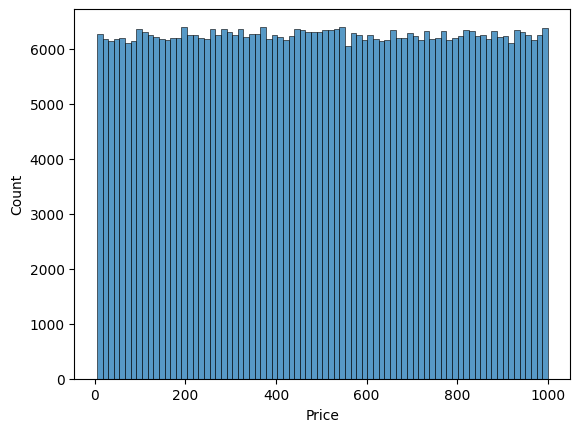

In [29]:
sns.histplot(df.Price)

<Axes: xlabel='Quantity', ylabel='Count'>

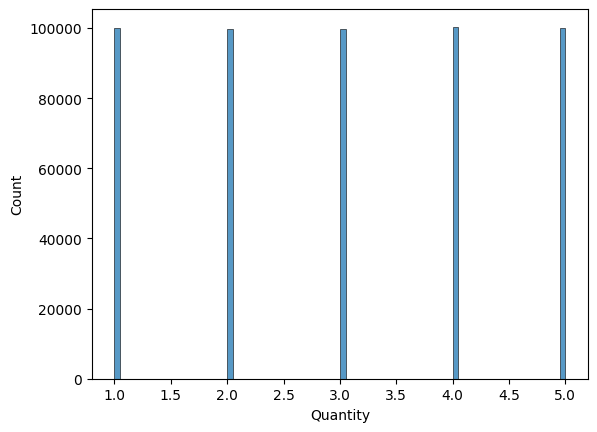

In [30]:
sns.histplot(df.Quantity)

In [7]:
num_cols = ['Price', 'Quantity', 'Discount (%)']
cat_cols = ['Region', 'Category']

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
scaler = {}
for col in num_cols:
    mi = MinMaxScaler()
    df[col] = mi.fit_transform(df[[col]])
    scaler[col] = mi

In [11]:
df.head()

,Transaction Date,Customer ID,Region,Product,Category,Price,Quantity,Discount (%),Total Revenue,Payment Method
0,2022-10-21,CUST_32167,Asia,Product_8109,Fashion,0.804541,0.75,0.121000,3105.08,Cash
1,2022-07-25,CUST_79483,Europe,Product_7873,Books,0.088403,0.00,0.061000,91.26,Cash
2,2023-08-24,CUST_97186,Europe,Product_9334,Home & Kitchen,0.699374,0.50,0.728667,1642.98,PayPal
3,2023-11-23,CUST_50953,Asia,Product_1364,Electronics,0.504739,0.50,0.489000,1298.41,Credit Card
4,2022-04-11,CUST_43293,Europe,Product_9899,Toys & Games,0.985859,1.00,0.873000,3638.54,PayPal


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
one_encoder = {}
for col in cat_cols:
    encoder  = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
    encoder.fit(df[cat_cols])
    encoded_col = encoder.get_feature_names_out(cat_cols).tolist()
    df[encoded_col] = encoder.transform(df[cat_cols])
    one_encoder[col] = encoder

In [22]:
df

,Transaction Date,Customer ID,Region,Product,Category,Price,Quantity,Discount (%),Total Revenue,Payment Method,...,Region_North America,Region_South America,Category_Automotive,Category_Books,Category_Electronics,Category_Fashion,Category_Health & Beauty,Category_Home & Kitchen,Category_Sports & Outdoors,Category_Toys & Games
0,2022-10-21,CUST_32167,Asia,Product_8109,Fashion,0.804541,0.75,0.121000,3105.08,Cash,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2022-07-25,CUST_79483,Europe,Product_7873,Books,0.088403,0.00,0.061000,91.26,Cash,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-08-24,CUST_97186,Europe,Product_9334,Home & Kitchen,0.699374,0.50,0.728667,1642.98,PayPal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2023-11-23,CUST_50953,Asia,Product_1364,Electronics,0.504739,0.50,0.489000,1298.41,Credit Card,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2022-04-11,CUST_43293,Europe,Product_9899,Toys & Games,0.985859,1.00,0.873000,3638.54,PayPal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2022-02-10,CUST_85621,Africa,Product_6,Sports & Outdoors,0.611695,0.50,0.503333,1562.92,Credit Card,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
499996,2022-11-04,CUST_22256,South America,Product_3590,Fashion,0.922291,1.00,0.435333,4010.85,PayPal,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
499997,2023-11-06,CUST_74548,Europe,Product_4291,Fashion,0.682831,0.25,0.562333,1137.90,Crypto,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
499998,2023-07-07,CUST_93833,Australia,Product_4840,Books,0.370366,0.50,0.649333,902.25,Crypto,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
encoder  = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [16]:
cat_cols

['Region', 'Category']

In [14]:
encoder.fit(df[cat_cols])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [18]:
encoded_col = encoder.get_feature_names_out(cat_cols).tolist()
encoded_col

['Region_Africa',
 'Region_Asia',
 'Region_Australia',
 'Region_Europe',
 'Region_North America',
 'Region_South America',
 'Category_Automotive',
 'Category_Books',
 'Category_Electronics',
 'Category_Fashion',
 'Category_Health & Beauty',
 'Category_Home & Kitchen',
 'Category_Sports & Outdoors',
 'Category_Toys & Games']

In [19]:
df[encoded_col] = encoder.transform(df[cat_cols])

In [20]:
df[encoded_col]

,Region_Africa,Region_Asia,Region_Australia,Region_Europe,Region_North America,Region_South America,Category_Automotive,Category_Books,Category_Electronics,Category_Fashion,Category_Health & Beauty,Category_Home & Kitchen,Category_Sports & Outdoors,Category_Toys & Games
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
499996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
499997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
499998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df

,Transaction Date,Customer ID,Product,Price,Quantity,Discount (%),Total Revenue,Payment Method,Region_0.0,Region_1.0,Category_0.0,Category_1.0,Region_0.0,Region_1.0,Category_0.0,Category_1.0
0,2022-10-21,CUST_32167,Product_8109,0.804541,0.75,0.121000,3105.08,Cash,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2022-07-25,CUST_79483,Product_7873,0.088403,0.00,0.061000,91.26,Cash,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2023-08-24,CUST_97186,Product_9334,0.699374,0.50,0.728667,1642.98,PayPal,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,2023-11-23,CUST_50953,Product_1364,0.504739,0.50,0.489000,1298.41,Credit Card,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,2022-04-11,CUST_43293,Product_9899,0.985859,1.00,0.873000,3638.54,PayPal,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2022-02-10,CUST_85621,Product_6,0.611695,0.50,0.503333,1562.92,Credit Card,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
499996,2022-11-04,CUST_22256,Product_3590,0.922291,1.00,0.435333,4010.85,PayPal,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
499997,2023-11-06,CUST_74548,Product_4291,0.682831,0.25,0.562333,1137.90,Crypto,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
499998,2023-07-07,CUST_93833,Product_4840,0.370366,0.50,0.649333,902.25,Crypto,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [20]:
df.columns

Index(['Transaction Date', 'Customer ID', 'Region', 'Product', 'Category',
       'Price', 'Quantity', 'Discount (%)', 'Total Revenue', 'Payment Method'],
      dtype='object')

In [23]:
x=df[num_cols+encoded_col]
y = df['Total Revenue']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)

In [25]:
len(y_test)

400000

In [27]:
x_train

,Price,Quantity,Discount (%),Region_Africa,Region_Asia,Region_Australia,Region_Europe,Region_North America,Region_South America,Category_Automotive,Category_Books,Category_Electronics,Category_Fashion,Category_Health & Beauty,Category_Home & Kitchen,Category_Sports & Outdoors,Category_Toys & Games
146480,0.088272,0.00,0.876333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72973,0.741706,0.25,0.297000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
322066,0.992482,1.00,0.443667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218896,0.633373,0.75,0.845333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86868,0.900180,1.00,0.326000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.075840,1.00,0.556333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
365838,0.887255,0.50,0.700667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
131932,0.611423,0.00,0.777667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146867,0.410024,0.00,0.221000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import joblib

In [29]:
model = RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
model.score(x_test,y_test)

0.9999865782773916

In [33]:
joblib.dump(scaler,'scaler.pkl')
joblib.dump(encoder,'encoder.pkl')
joblib.dump(model,'model.pkl')

['model.pkl']

In [32]:
df.Quantity.unique()

array([0.75, 0.  , 0.5 , 1.  , 0.25])